In [1]:
%matplotlib inline

import os
import sys
import math
import pandas as pd
import multiprocessing as mp
import matplotlib.pyplot as plt
from functools import partial

module_path = os.path.abspath(os.path.join('..'))
src_path = '{}/src'.format(module_path)
if module_path not in sys.path:
    sys.path.append(src_path)
    
from preprocessing import select
from consts import dataset, model_cols

plt.rcParams.update({'figure.max_open_warning': 0})

# Análises a cerca da base de dados

## Carregando bases
- Base inicial (com todas as instâncias)
- Base amostral (cerca de 8000 instâncias e 60 variáveis)

In [2]:
database_path = '{}/data/processed/database.csv'.format(module_path)
dataset_path = '{}/data/processed/dataset.csv'.format(module_path)
sample_path = '{}/data/processed/sample.csv'.format(module_path)

df_database = pd.read_csv(database_path)
df_dataset = pd.read_csv(dataset_path)
df_sample = pd.read_csv(sample_path)

## Depressão x Região

In [3]:
a = df_database.query('Diagnosticado_Depressao == 1')['Regiao'].value_counts()
b = df_database.query('Diagnosticado_Depressao == 1 | Diagnosticado_Depressao == 2')['Regiao'].value_counts()
c = ((a / b) * 100)
cols = {
    11: 'Rondônia', 12: 'Acre', 13: 'Amazonas', 14: 'Roraima', 15: 'Pará', 16: 'Amapá', 17: 'Tocantis',
    21: 'Maranhão', 22: 'Piauí', 23: 'Ceará', 24: 'Rio Grande do Norte', 25: 'Paraíba', 26: 'Pernambuco',
    27: 'Alagoas', 28: 'Sergipe', 29: 'Bahia',
    31: 'Minas Gerais', 32: 'Espírito Santo', 33: 'Rio de Janeiro', 35: 'São Paulo',
    41: 'Paraná', 42: 'Santa Catarina', 43: 'Rio Grande do Sul',
    50: 'Mato Grosso do Sul', 51: 'Mato Grosso', 52: 'Goiás', 53: 'Distrito Federal'
}

select(c.to_frame().transpose(), cols).transpose()

,Regiao
Rondônia,4.604486
Acre,5.292172
Amazonas,2.629544
Roraima,4.839723
Pará,2.694611
Amapá,3.828829
Tocantis,7.260726
Maranhão,3.551297
Piauí,4.656319
Ceará,5.078125


## Dados Ausentes

(a) Considerando todos os atributos;  
(b) Considerando um limiar de <= 80%;
(c) Atributos com ausência > 80%.

In [4]:
n = df_dataset.shape[0]
missing_vals = ((n - df_dataset.count()) / df_dataset.shape[0]) * 100
cols = { 0: 'Porcentagem' }

select(missing_vals.to_frame(), cols)

,Porcentagem
Regiao,0.000000
Diagnosticado_Depressao,0.000000
Defic_Intelectual,0.000000
Nasceu_Ou_Adquiriu_Defic_Intelectual,98.996458
Defic_Intelectual_Limita_Atividades,98.996458
Doença_Fisica_Cronica_Mental,0.000000
Visita_Medico,96.198347
Doença_Cerebral_Limita,96.198347
Esqz_Bipol_Psicose_TOC,0.000000
Psicoterapia_Doenca_Mental,96.198347


In [5]:
limiar = missing_vals[missing_vals <= 80]
select(limiar.to_frame(), cols)

,Porcentagem
Regiao,0.000000
Diagnosticado_Depressao,0.000000
Defic_Intelectual,0.000000
Doença_Fisica_Cronica_Mental,0.000000
Esqz_Bipol_Psicose_TOC,0.000000
Diagnostico_Doenca_Coracao,0.000000
Diagnostico_Doença_Pulmao,0.000000
Diagnostico_Cancer,0.000000
Diagnostico_Insuf_Renal_Cronica,0.000000
Duas_Semanas_Cansado,1.050767


In [6]:
limiar = missing_vals[missing_vals > 80]
select(limiar.to_frame(), cols)

,Porcentagem
Nasceu_Ou_Adquiriu_Defic_Intelectual,98.996458
Defic_Intelectual_Limita_Atividades,98.996458
Visita_Medico,96.198347
Doença_Cerebral_Limita,96.198347
Psicoterapia_Doenca_Mental,96.198347
Medicamentos_Doenca_Mental,96.198347
Diagnostico_Infarto,93.435655
Diagnostico_Angina,93.435655
Diagnostico_Insuf_Cardiaca,93.435655
Diagnostico_Enf_Pulmonar,97.201889


## Descrição da base amostral

In [7]:
df_dataset[['Idade', 'Uso_Quantos_Dias_Remedio_Dormir', 'Idade_Gravidez', 'Parou_Menstruar']].describe()

,Idade,Uso_Quantos_Dias_Remedio_Dormir,Idade_Gravidez,Parou_Menstruar
count,8470.000000,1824.000000,2714.000000,1857.000000
mean,45.209091,10.518640,20.670965,46.135164
std,16.095479,4.812865,5.276546,10.336240
min,18.000000,1.000000,0.000000,0.000000
25%,32.000000,7.000000,17.000000,44.000000
50%,44.000000,14.000000,19.000000,48.000000
75%,57.000000,14.000000,23.000000,52.000000
max,101.000000,14.000000,42.000000,65.000000


In [8]:
df_dataset.query('Diagnosticado_Depressao == 1')['Idade'].value_counts()

50    113
38    111
47    111
42    105
43    104
33    103
35    103
44    102
49    100
54     98
52     98
40     95
39     95
51     95
53     95
56     92
36     92
34     91
48     90
30     90
31     88
46     88
45     86
57     83
41     83
37     82
32     81
60     81
55     80
58     78
     ... 
73     36
69     36
74     36
68     34
71     34
70     31
75     30
21     28
72     28
77     27
22     27
23     27
76     25
19     24
20     24
78     23
80     16
18     15
79     15
82     11
84      8
81      8
85      8
83      7
86      5
88      4
89      4
90      3
87      2
94      1
Name: Idade, Length: 74, dtype: int64

In [9]:
df_dataset.query('Diagnosticado_Depressao == 2')['Idade'].value_counts()

31     118
28     112
34     112
33     109
32     107
36     103
35     103
43     101
29      97
30      95
38      95
18      95
27      94
37      93
25      92
40      91
26      90
22      87
24      86
20      86
48      84
41      83
23      83
39      79
46      77
45      75
49      75
21      73
42      72
51      70
      ... 
71      33
66      33
73      32
69      31
68      26
74      25
76      24
70      24
75      23
77      23
72      22
79      17
80      17
81      14
85      14
78      14
84      13
82      11
83       9
86       6
87       6
89       6
90       5
91       4
92       3
96       2
94       2
88       1
93       1
101      1
Name: Idade, Length: 79, dtype: int64

## Histogramas (frequência de cada atributo x valor)

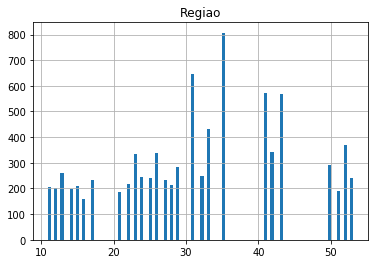

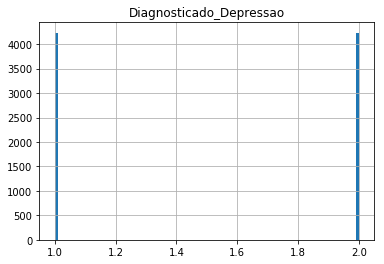

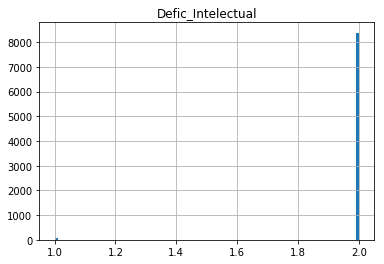

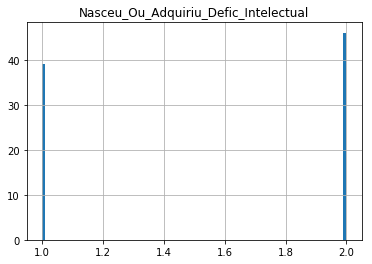

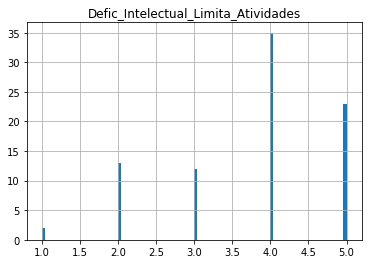

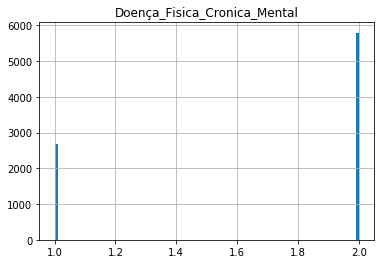

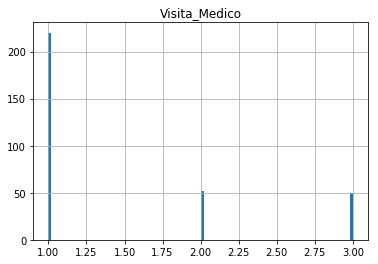

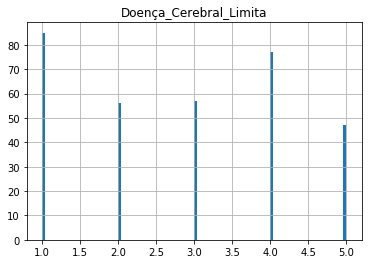

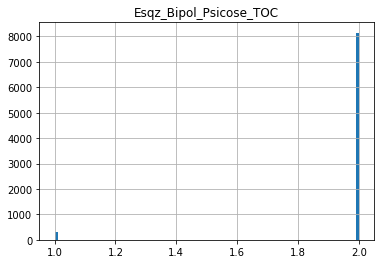

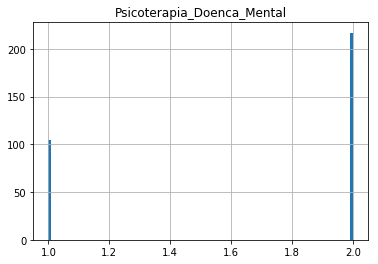

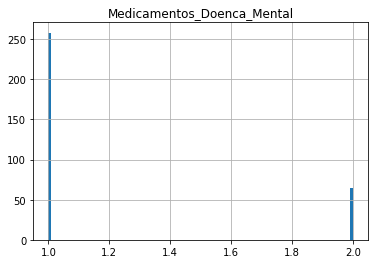

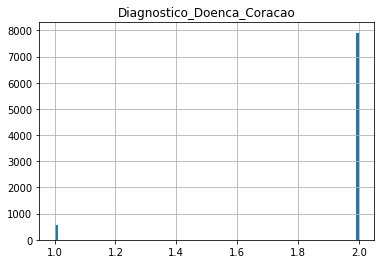

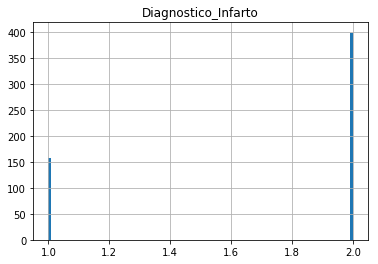

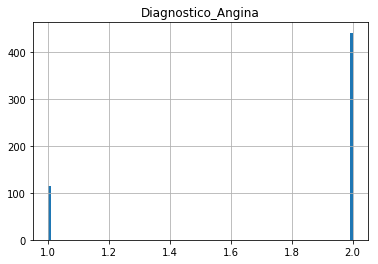

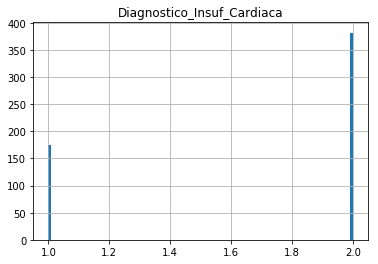

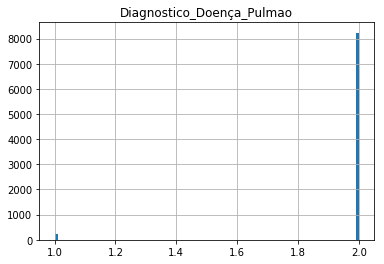

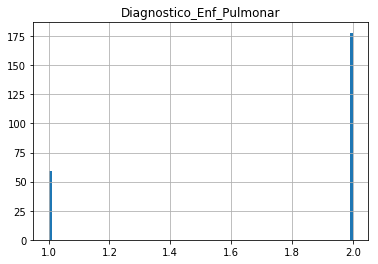

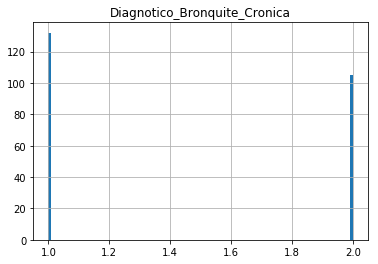

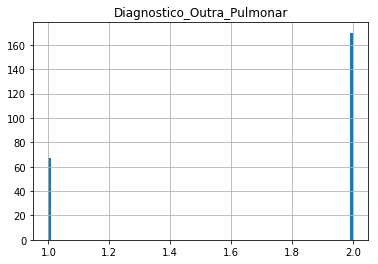

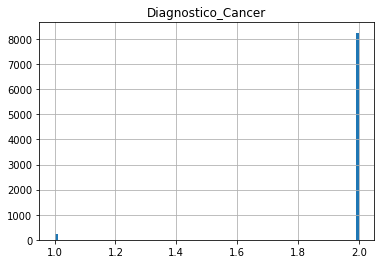

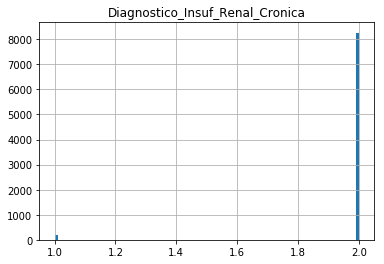

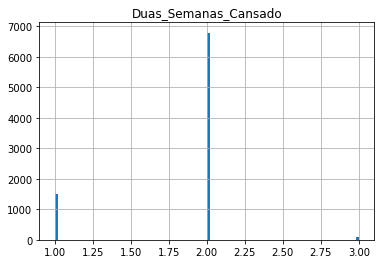

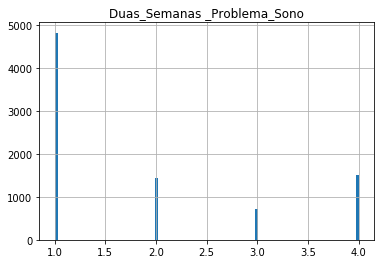

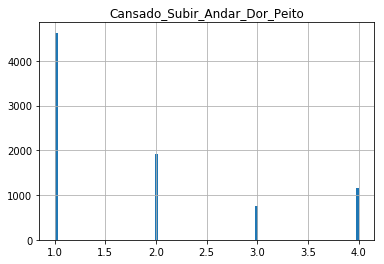

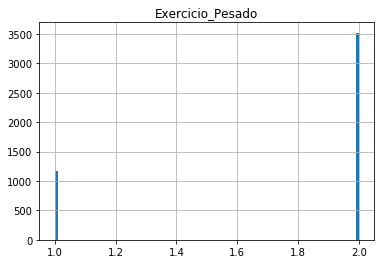

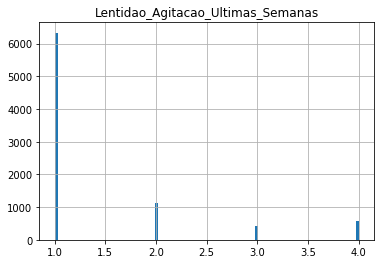

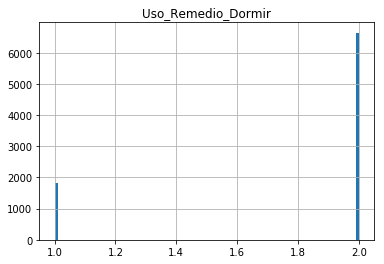

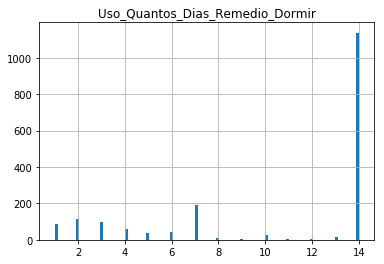

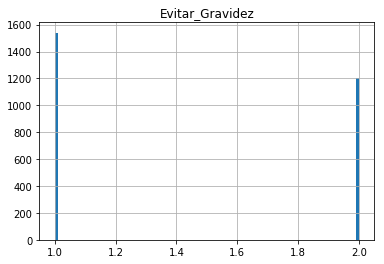

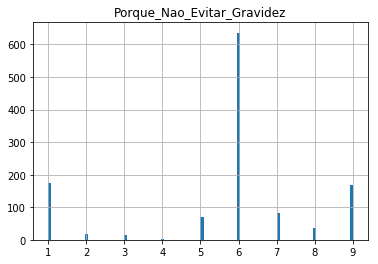

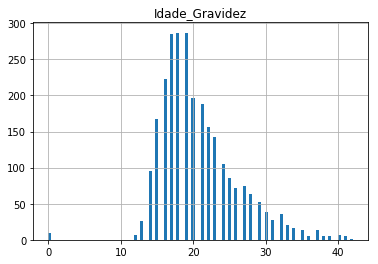

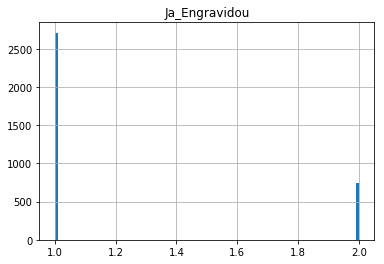

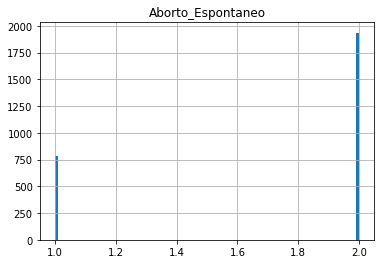

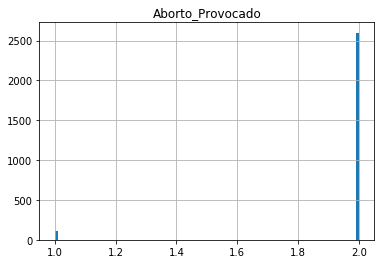

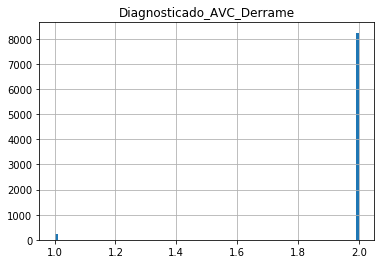

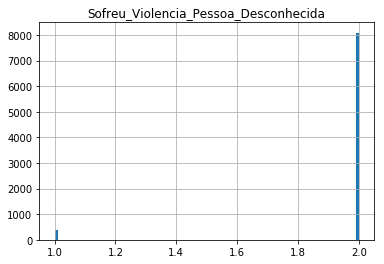

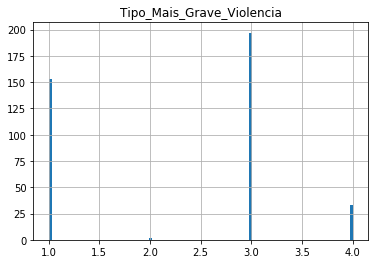

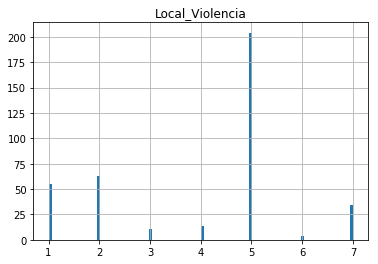

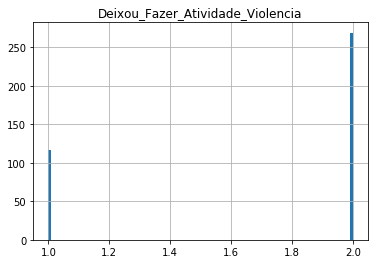

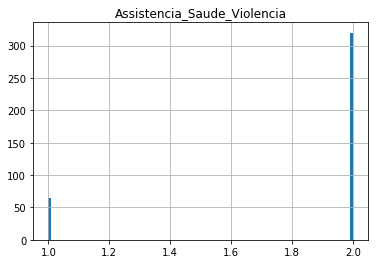

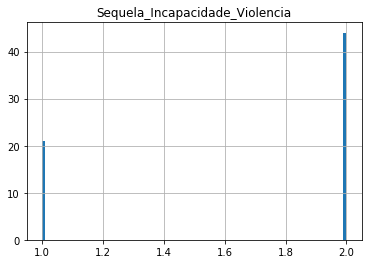

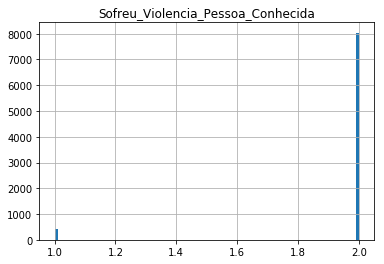

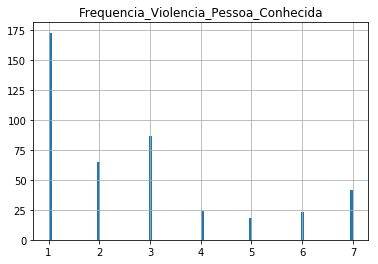

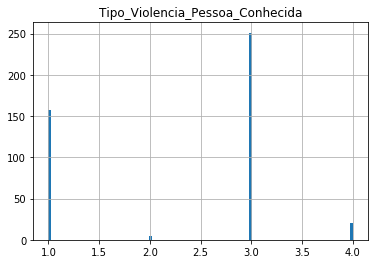

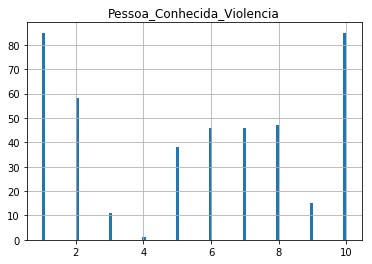

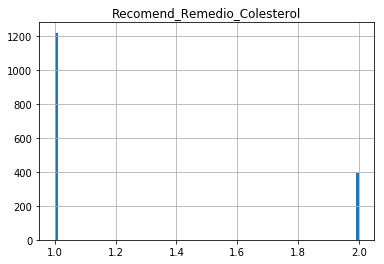

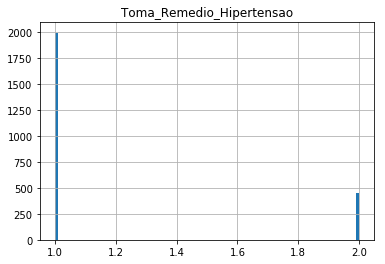

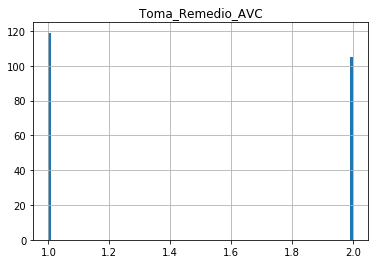

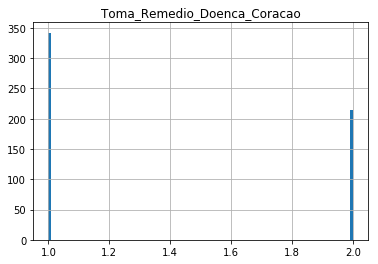

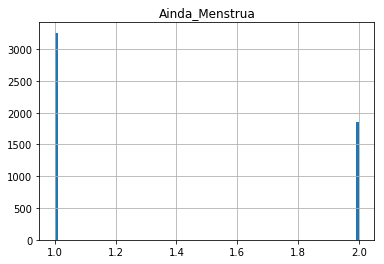

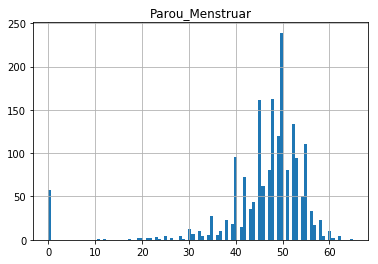

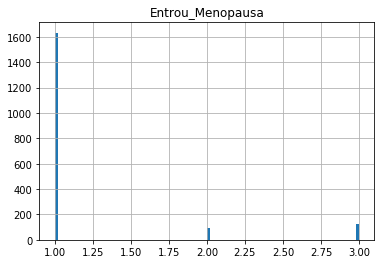

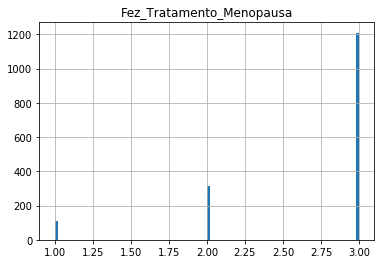

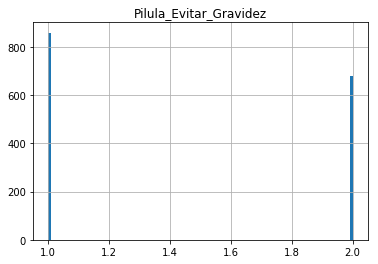

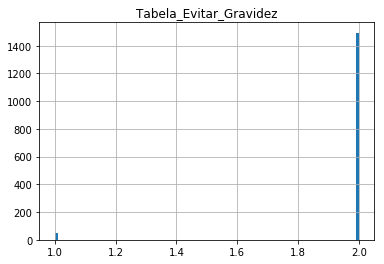

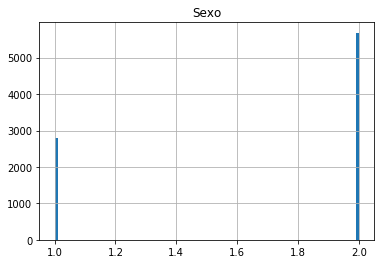

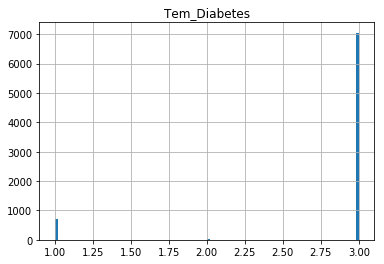

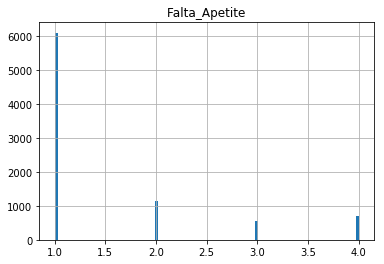

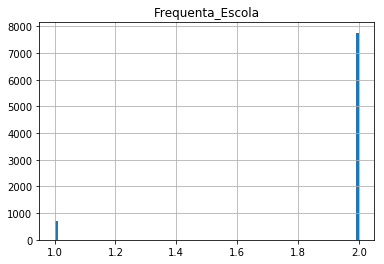

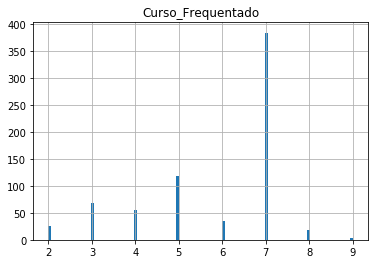

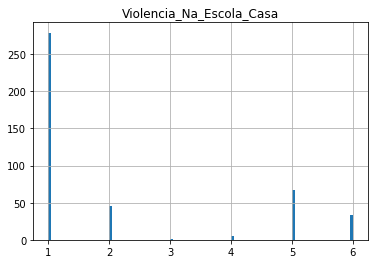

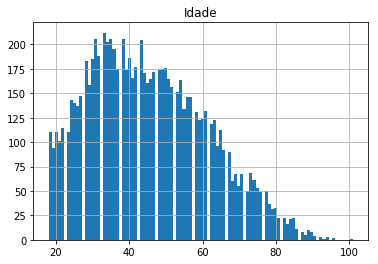

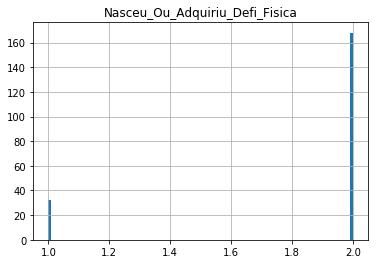

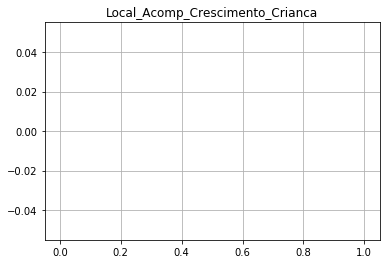

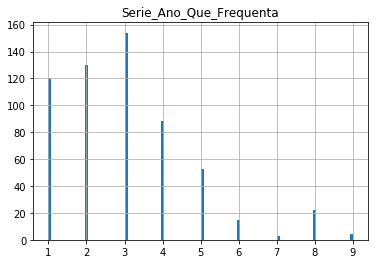

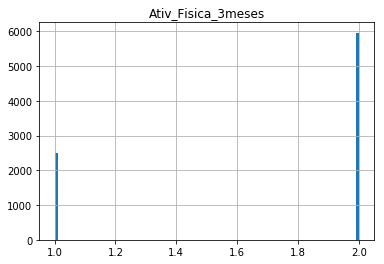

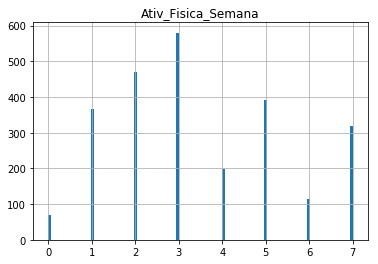

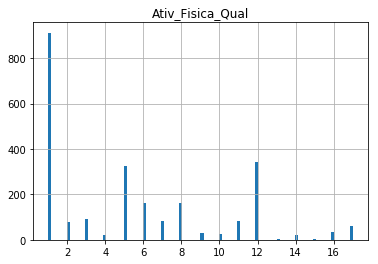

In [10]:
for col in list(df_sample):
    df_dataset.hist(column=col, bins=100)

## Análise dos atributos numéricos

- Utilizaremos uma amostra de 1000 instâncias selecionadas aleatoriamente (exceto para os outliers)

### Intervalo de Confiança

(a) Idade;  
(b) Parou de menstruar;  
(c) Uso por quantos dias de remédio para dormir;  
(d) Idade da gravidez.

In [11]:
z = 2.054 # 96%
s = df_sample['Idade'].std()
m = df_sample['Idade'].mean()
n = df_sample.shape[0]
p1 = m - (z * (s/math.sqrt(n)))
p2 = m + (z * (s/math.sqrt(n)))
print("{} < {} < {}".format(p1,m,p2))

44.95023567980594 < 46.006 < 47.06176432019406


In [12]:
z = 2.054 # 96%
s = df_sample['Parou_Menstruar'].std()
m = df_sample['Parou_Menstruar'].mean() 
n = df_sample.shape[0]
p1 = m - (z * (s/math.sqrt(n)))
p2 = m + (z * (s/math.sqrt(n)))
print("{} < {} < {}".format(p1,m,p2))

46.45377490081568 < 47.064516129032256 < 47.67525735724883


In [13]:
z = 2.054 # 96%
s = df_sample['Uso_Quantos_Dias_Remedio_Dormir'].std()
m = df_sample['Uso_Quantos_Dias_Remedio_Dormir'].mean() 
n = df_sample.shape[0]
p1 = m - (z * (s/math.sqrt(n)))
p2 = m + (z * (s/math.sqrt(n)))
print("{} < {} < {}".format(p1,m,p2))

9.9349959955088 < 10.251162790697675 < 10.56732958588655


In [14]:
z = 2.054 # 96%
s = df_sample['Idade_Gravidez'].std()
m = df_sample['Idade_Gravidez'].mean() 
n = df_sample.shape[0]
p1 = m - (z * (s/math.sqrt(n)))
p2 = m + (z * (s/math.sqrt(n)))
print("{} < {} < {}".format(p1,m,p2))

20.212208017276296 < 20.549689440993788 < 20.88717086471128


### Poder Discriminativo de variáveis

(a) Idade;  
(b) Parou de menstruar;  
(c) Uso por quantos dias de remédio para dormir;  
(d) Idade da gravidez.

In [15]:
df_dep = df_sample.loc[df_sample['Diagnosticado_Depressao'] == 1]
s1 = df_dep['Idade'].std()
m1 = df_dep['Idade'].mean()
n1 = df_dep['Idade'].count()

df_ndep = df_sample.loc[df_sample['Diagnosticado_Depressao'] == 2]
s2 = df_ndep['Idade'].std()
m2 = df_ndep['Idade'].mean()
n2 = df_ndep['Idade'].count()

sa = math.pow(s1,2)/n1
sb = math.pow(s2,2)/n2

t = math.sqrt(sa + sb)
limiar = (m1 - m2)/t

print("Limiar : {} > {} ?".format(limiar,0.5))

Limiar : 3.9646162702141594 > 0.5 ?


In [16]:
df_dep = df_sample.loc[df_sample['Diagnosticado_Depressao'] == 1]
s1 = df_dep['Parou_Menstruar'].std()
m1 = df_dep['Parou_Menstruar'].mean()
n1 = df_dep['Parou_Menstruar'].count()

df_ndep = df_sample.loc[df_sample['Diagnosticado_Depressao'] == 2]
s2 = df_ndep['Parou_Menstruar'].std()
m2 = df_ndep['Parou_Menstruar'].mean()
n2 = df_ndep['Parou_Menstruar'].count()

sa = math.pow(s1,2)/n1
sb = math.pow(s2,2)/n2

t = math.sqrt(sa + sb)
limiar = abs((m1 - m2)/t)

print("Limiar : {} > {} ?".format(limiar,0.5))

Limiar : 1.6232243722633937 > 0.5 ?


In [17]:
df_dep = df_sample.loc[df_sample['Diagnosticado_Depressao'] == 1]
s1 = df_dep['Uso_Quantos_Dias_Remedio_Dormir'].std()
m1 = df_dep['Uso_Quantos_Dias_Remedio_Dormir'].mean()
n1 = df_dep['Uso_Quantos_Dias_Remedio_Dormir'].count()

df_ndep = df_sample.loc[df_sample['Diagnosticado_Depressao'] == 2]
s2 = df_ndep['Uso_Quantos_Dias_Remedio_Dormir'].std()
m2 = df_ndep['Uso_Quantos_Dias_Remedio_Dormir'].mean()
n2 = df_ndep['Uso_Quantos_Dias_Remedio_Dormir'].count()

sa = math.pow(s1,2)/n1
sb = math.pow(s2,2)/n2

t = math.sqrt(sa + sb)
limiar = abs((m1 - m2)/t)

print("Limiar : {} > {} ?".format(limiar,0.5))

Limiar : 0.40986606294031175 > 0.5 ?


In [18]:
df_dep = df_sample.loc[df_sample['Diagnosticado_Depressao'] == 1]
s1 = df_dep['Idade_Gravidez'].std()
m1 = df_dep['Idade_Gravidez'].mean()
n1 = df_dep['Idade_Gravidez'].count()

df_ndep = df_sample.loc[df_sample['Diagnosticado_Depressao'] == 2]
s2 = df_ndep['Idade_Gravidez'].std()
m2 = df_ndep['Idade_Gravidez'].mean()
n2 = df_ndep['Idade_Gravidez'].count()

sa = math.pow(s1,2)/n1
sb = math.pow(s2,2)/n2

t = math.sqrt(sa + sb)
limiar = abs((m1 - m2)/t)

print("Limiar : {} > {} ?".format(limiar,0.5))

Limiar : 0.7573233252981265 > 0.5 ?


### Outliers

In [19]:
df_outliers = df_dataset[['Idade', 'Parou_Menstruar', 'Uso_Quantos_Dias_Remedio_Dormir', 'Idade_Gravidez']]
limiar = 3 * df_outliers.std()
mean = df_outliers.mean()
outliers = (df_outliers < mean - limiar) | (df_outliers > mean + limiar)
outliers.describe()

,Idade,Parou_Menstruar,Uso_Quantos_Dias_Remedio_Dormir,Idade_Gravidez
count,8470,8470,8470,8470
unique,2,2,1,2
top,False,False,False,False
freq,8464,8411,8470,8426
